Uma metalúrgica está sendo contratada por uma fábrica de papel para projetar e construir um tanque retangular de aço, com base quadrada, sem tampa e com 500 m³ de volume. O tanque será construído soldando-se chapas de aço umas às outras ao longo das bordas. O desafio é determinar as dimensões para a base e para a altura que farão o tanque pesar o mínimo possível.
(a) Descreva como você irá levar o peso em consideração para resolver o problema (custo-benefício);
(b) Escreva uma fórmula S(x) para a  área do tanque em função da medida x do lado da base;
(c) Construa o gráfico dessa função no python;
(d) Faça uma animação da reta tangente percorrendo cada ponto do gráfico (em um domínio que faça sentido para o problema) e ilustre o momento em que a reta tangente é paralela ao eixo x.
(e) Utilizando derivadas, encontre o valor de x que torna a área mínima.

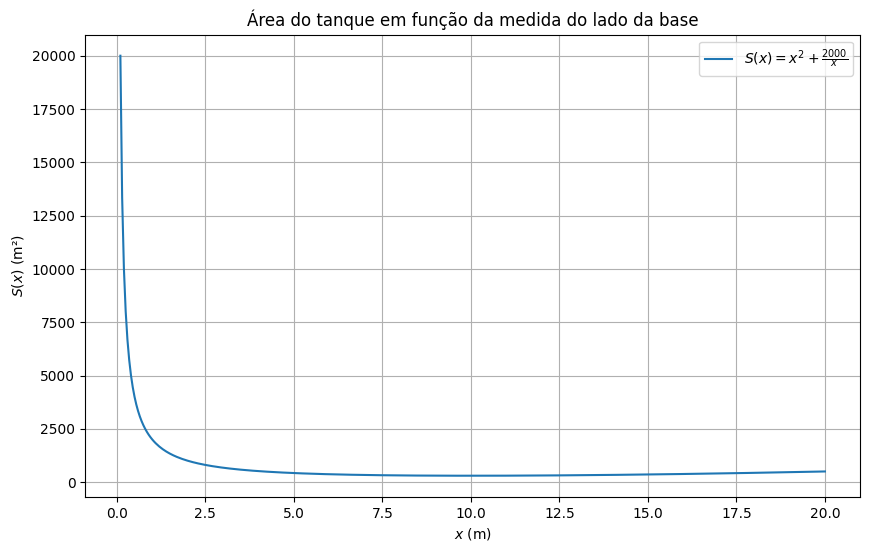

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Definindo a função S(x)
def S(x):
    return x**2 + 2000/x

# Gerando valores de x
x = np.linspace(0.1, 20, 400)
y = S(x)

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='$S(x) = x^2 + \\frac{2000}{x}$')
plt.title('Área do tanque em função da medida do lado da base')
plt.xlabel('$x$ (m)')
plt.ylabel('$S(x)$ (m²)')
plt.legend()
plt.grid(True)
plt.show()


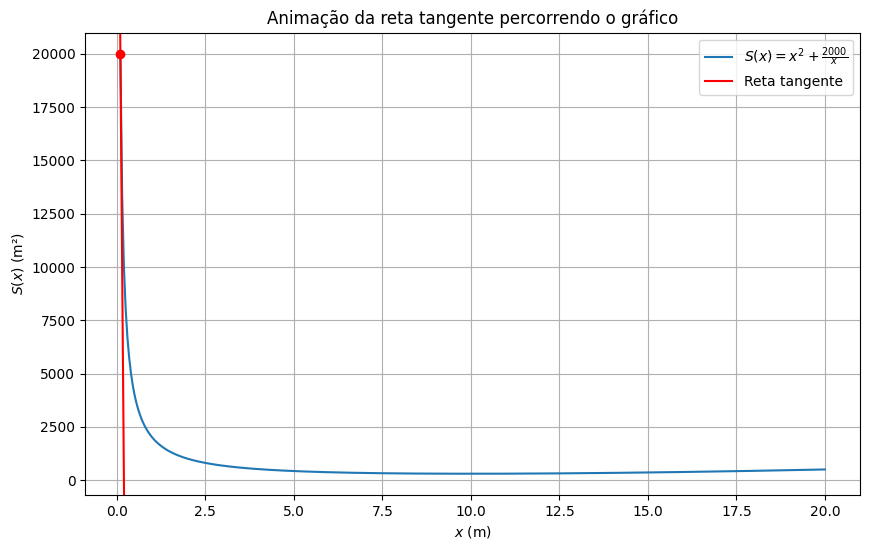

In [2]:
import matplotlib.animation as animation

# Definindo a derivada de S(x)
def dSdx(x):
    return 2*x - 2000/x**2

# Configurações da figura
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, label='$S(x) = x^2 + \\frac{2000}{x}$')
line, = ax.plot([], [], 'r-', label='Reta tangente')
point, = ax.plot([], [], 'ro')

# Função para calcular a reta tangente em x
def tangente(x0):
    y0 = S(x0)
    slope = dSdx(x0)
    return x0, y0, slope

# Função de atualização da animação
def update(frame):
    x0, y0, slope = tangente(frame)
    x_tan = np.linspace(x0 - 2, x0 + 2, 100)
    y_tan = slope * (x_tan - x0) + y0
    line.set_data(x_tan, y_tan)
    point.set_data([x0], [y0])  # Modificação aqui para evitar o aviso de depreciação
    return line, point

# Configurando a animação
ani = animation.FuncAnimation(fig, update, frames=np.linspace(0.1, 20, 400), blit=True, interval=50)
ax.set_title('Animação da reta tangente percorrendo o gráfico')
ax.set_xlabel('$x$ (m)')
ax.set_ylabel('$S(x)$ (m²)')
ax.legend()
ax.grid(True)
plt.show()


Considere a função \( f(x) = x \cos(x)e^x \). Determine os polinômios de Taylor de ordens 2, 3 e 4 para essa função em torno do ponto \( x = 0 \). Em seguida, calcule os erros de aproximação para cada polinômio de Taylor em \( x = \frac{1}{\pi^2} \). Apresente os valores reais da função, os valores aproximados pelos polinômios de Taylor e os respectivos erros de aproximação para cada ordem.

In [3]:
import sympy as sp
import numpy as np

# Definindo a variável
x = sp.symbols('x')

# Definindo a função
f = x * sp.cos(x) * sp.exp(x)

# Calculando as derivadas
f_prime = sp.diff(f, x)
f_double_prime = sp.diff(f_prime, x)
f_triple_prime = sp.diff(f_double_prime, x)
f_quad_prime = sp.diff(f_triple_prime, x)

# Avaliando as derivadas em x = 0
f_0 = f.subs(x, 0)
f_prime_0 = f_prime.subs(x, 0)
f_double_prime_0 = f_double_prime.subs(x, 0)
f_triple_prime_0 = f_triple_prime.subs(x, 0)
f_quad_prime_0 = f_quad_prime.subs(x, 0)

# Construindo os polinômios de Taylor
T2 = f_0 + f_prime_0*x + f_double_prime_0*x**2/sp.factorial(2)
T3 = T2 + f_triple_prime_0*x**3/sp.factorial(3)
T4 = T3 + f_quad_prime_0*x**4/sp.factorial(4)

# Definindo a função para avaliação numérica
f_numeric = sp.lambdify(x, f, 'numpy')
T2_numeric = sp.lambdify(x, T2, 'numpy')
T3_numeric = sp.lambdify(x, T3, 'numpy')
T4_numeric = sp.lambdify(x, T4, 'numpy')

# Ponto de avaliação
x_val = 1 / np.pi**2

# Valores reais e aproximados
f_real = f_numeric(x_val)
T2_approx = T2_numeric(x_val)
T3_approx = T3_numeric(x_val)
T4_approx = T4_numeric(x_val)

# Erros de aproximação
error_T2 = abs(f_real - T2_approx)
error_T3 = abs(f_real - T3_approx)
error_T4 = abs(f_real - T4_approx)

# Resultados
print(f"Valor real de f(x) em x = {x_val}: {f_real:.10f}")
print(f"Valor aproximado por T2(x): {T2_approx:.10f}")
print(f"Erro de aproximação para T2(x): {error_T2:.10f}")
print(f"Valor aproximado por T3(x): {T3_approx:.10f}")
print(f"Erro de aproximação para T3(x): {error_T3:.10f}")
print(f"Valor aproximado por T4(x): {T4_approx:.10f}")
print(f"Erro de aproximação para T4(x): {error_T4:.10f}")


ModuleNotFoundError: No module named 'sympy'